# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.axes as ax
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import wrangle

import warnings

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Acquire and Clean Data

In [2]:
df = wrangle.acquire_heart()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = wrangle.clean_heart_data(df)
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000,60-65,Boarderline High,High Stage 2
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695,35-40,High,Hypertensive Crisis
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814,40-45,Boarderline High,High Stage 2
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618,55-60,Boarderline High,High Stage 2
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000,55-60,High,High Stage 2


In [4]:
train, validate, test = wrangle.split_heart_disease(df)
train.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
192,54,1,0,120,188,0,1,113,0,1.4,...,0,0.000000,0.287234,0.477876,0.000000,1.663717,0.000000,50-55,Desireable,Normal
266,55,0,0,180,327,0,2,117,1,3.4,...,0,0.000000,0.168196,0.470085,0.000000,2.794872,0.000000,50-55,High,Normal
103,42,1,2,120,240,1,1,194,0,0.8,...,1,0.047619,0.175000,0.216495,0.008333,1.237113,0.010309,40-45,Boarderline High,Hypertensive Crisis
250,51,1,0,140,298,0,1,122,1,4.2,...,0,0.000000,0.171141,0.418033,0.000000,2.442623,0.000000,50-55,High,Elevated
251,43,1,0,132,247,1,0,143,1,0.1,...,0,0.000000,0.174089,0.300699,0.000000,1.727273,0.000000,40-45,High,High Stage 2


In [5]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)
X_train.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,defect_type,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
192,54,1,0,120,188,0,1,113,0,1.4,...,3,0.000000,0.287234,0.477876,0.000000,1.663717,0.000000,50-55,Desireable,Normal
266,55,0,0,180,327,0,2,117,1,3.4,...,2,0.000000,0.168196,0.470085,0.000000,2.794872,0.000000,50-55,High,Normal
103,42,1,2,120,240,1,1,194,0,0.8,...,3,0.047619,0.175000,0.216495,0.008333,1.237113,0.010309,40-45,Boarderline High,Hypertensive Crisis
250,51,1,0,140,298,0,1,122,1,4.2,...,3,0.000000,0.171141,0.418033,0.000000,2.442623,0.000000,50-55,High,Elevated
251,43,1,0,132,247,1,0,143,1,0.1,...,3,0.000000,0.174089,0.300699,0.000000,1.727273,0.000000,40-45,High,High Stage 2


# Explore Univariate

#### Explore Age

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Boxen Plot'}, xlabel='age'>

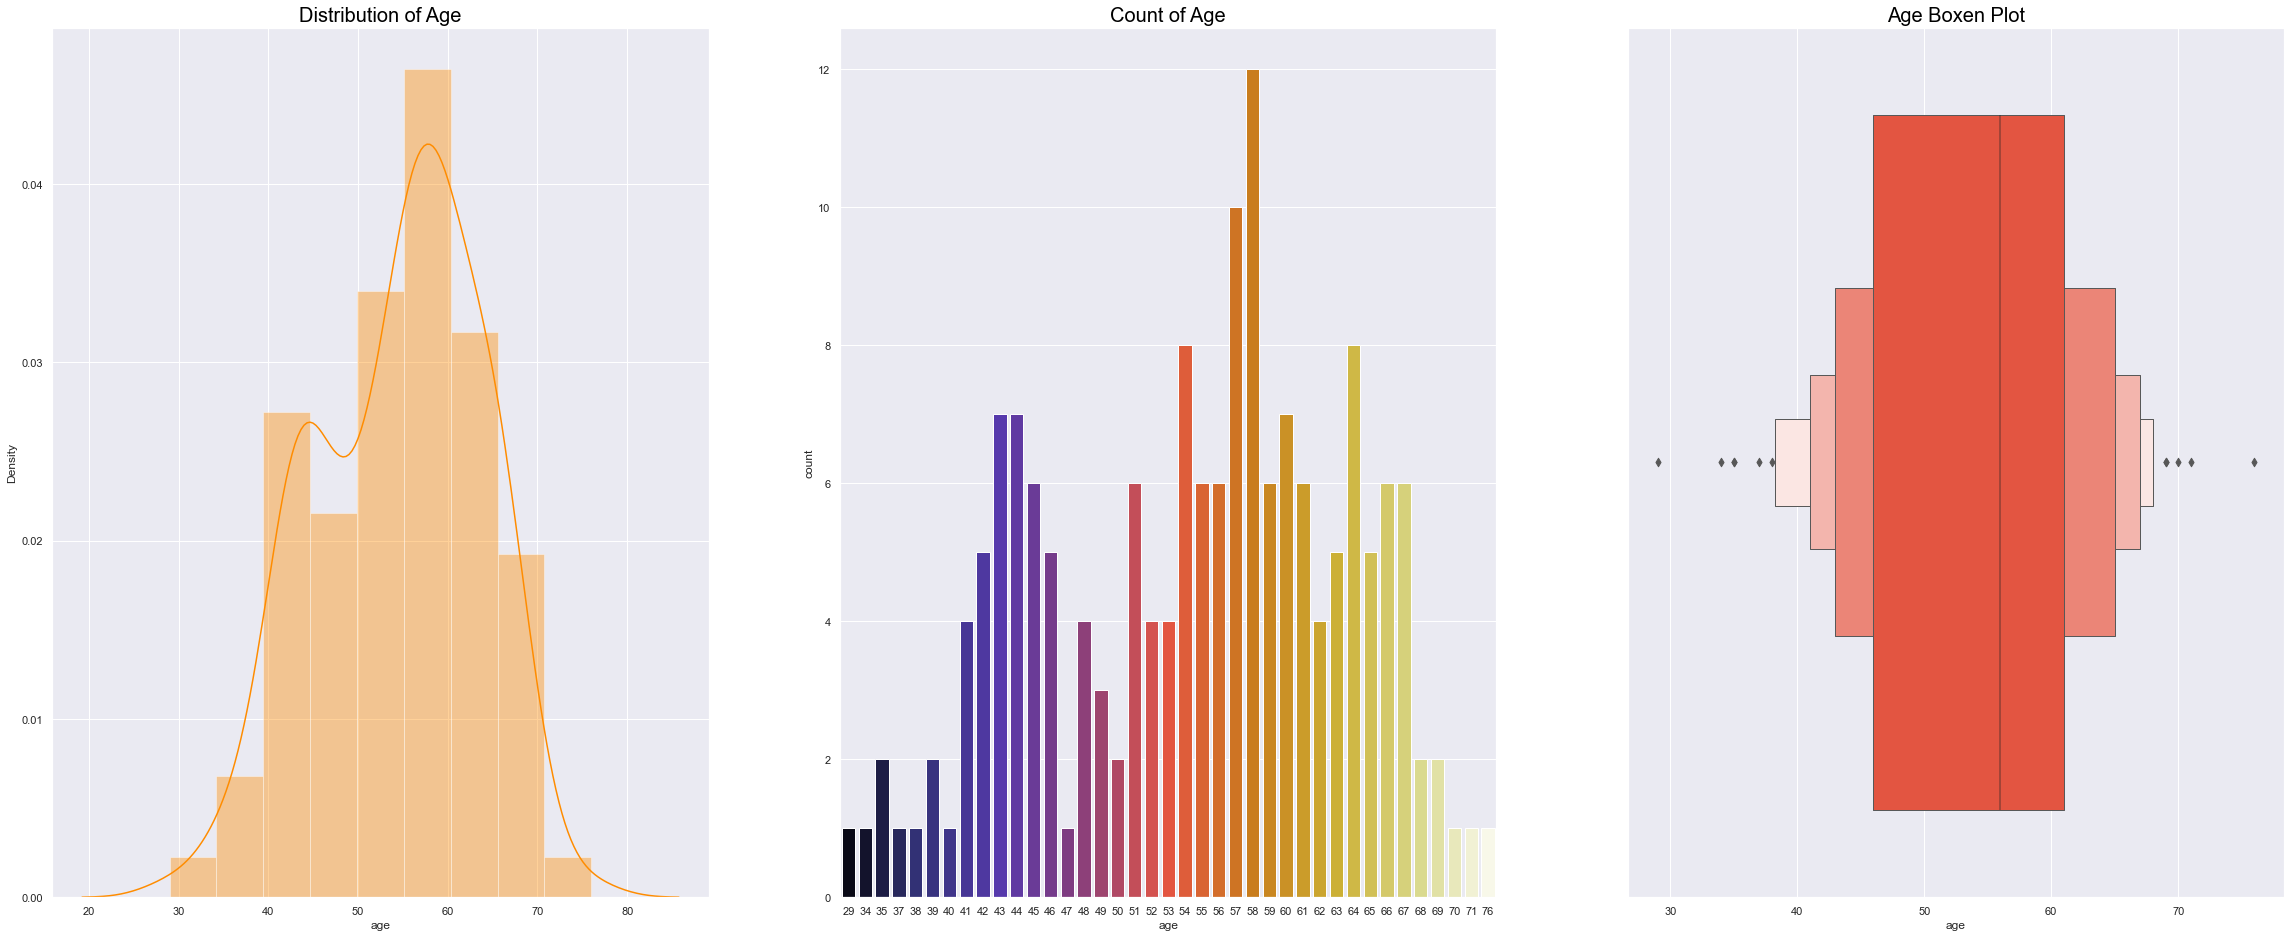

In [6]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Age", size=20, color='black')
sns.distplot(train.age, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Count of Age", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["age"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Age Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["age"], palette='CMRmap')

#### Takeaways:
- Age peaks at 58 years old.

___

#### Explore Gender

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Gender Histogram'}, xlabel='is_male', ylabel='Count'>

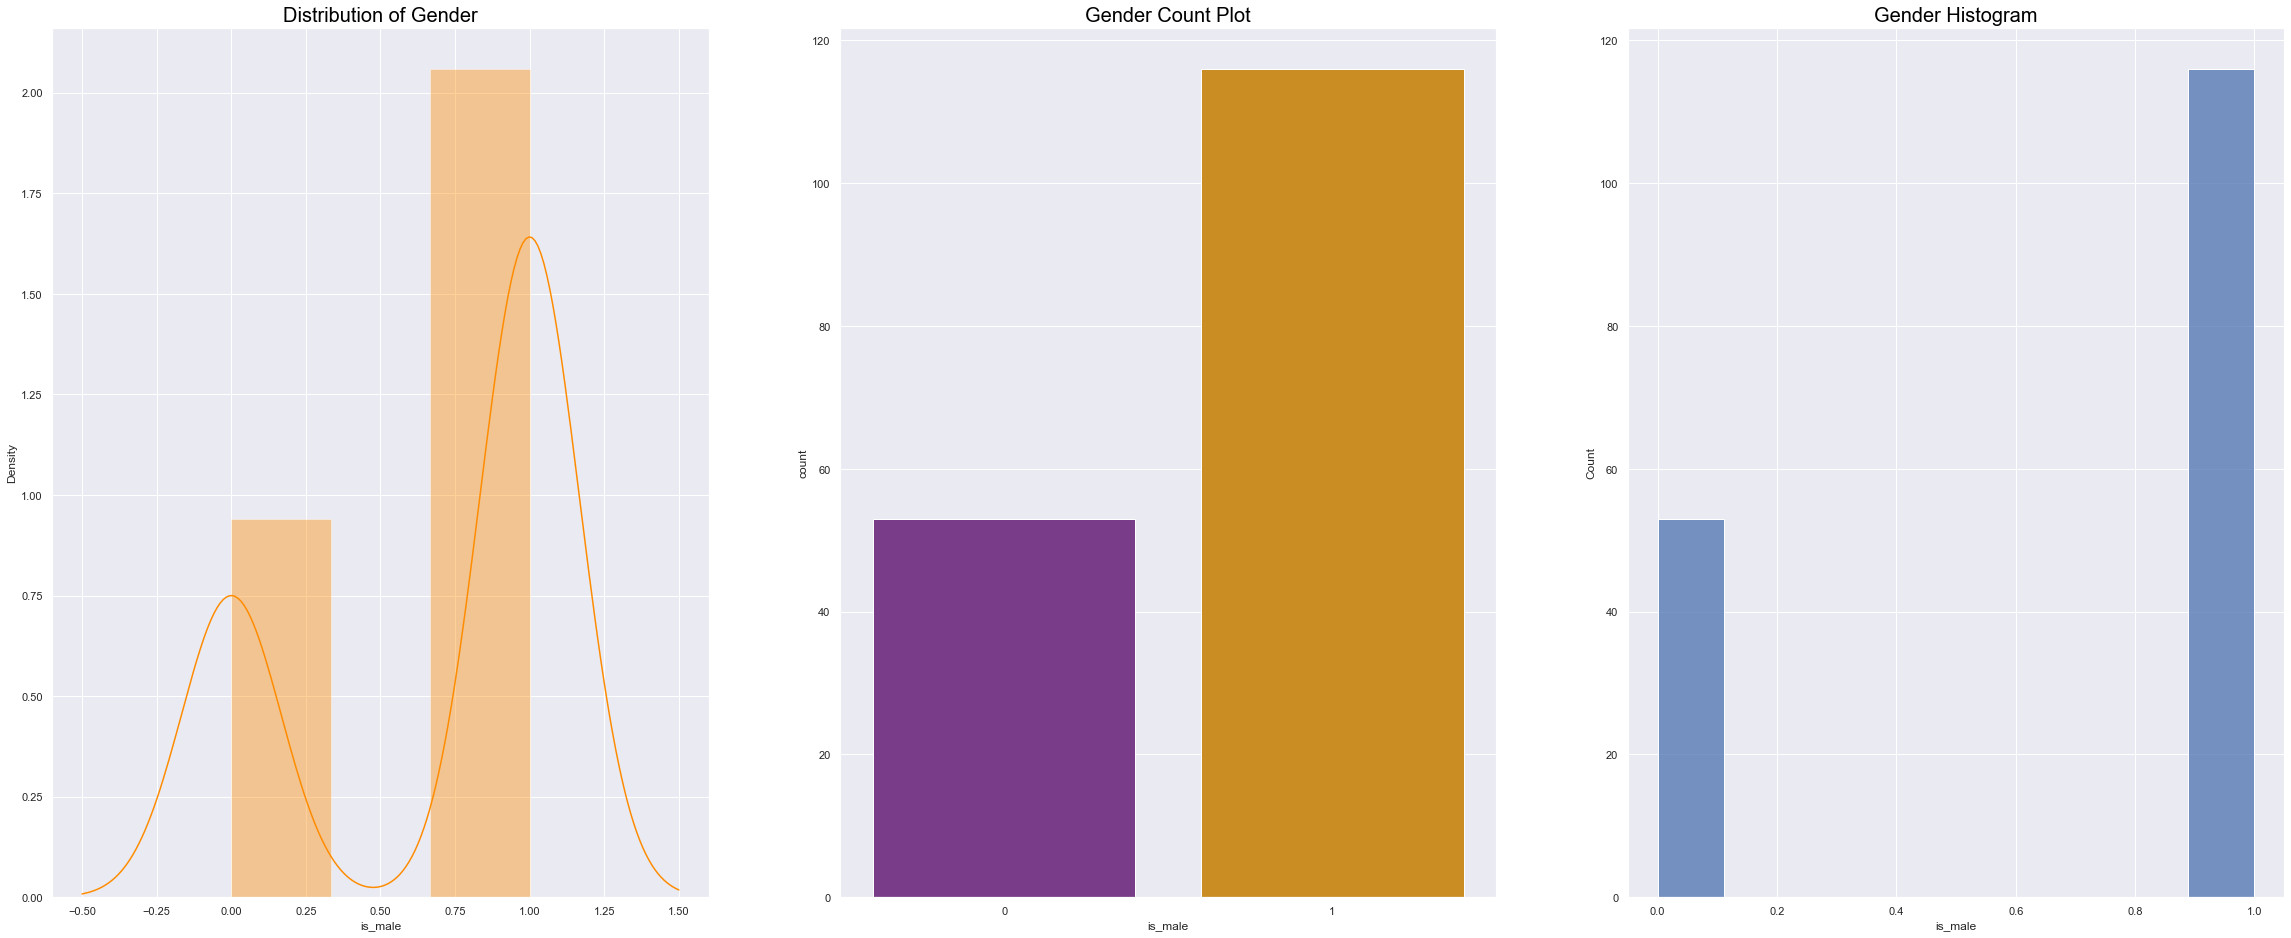

In [7]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Gender", size=20, color='black')
sns.distplot(train.is_male, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Gender Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["is_male"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Gender Histogram", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x=train["is_male"], palette='CMRmap')

#### Takeaways:
- There are far more men in this data set.
    - 116 men
    - 53 female

___

#### Explore Chest Pain

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Chest Pain Histogram'}, xlabel='chest_pain', ylabel='Count'>

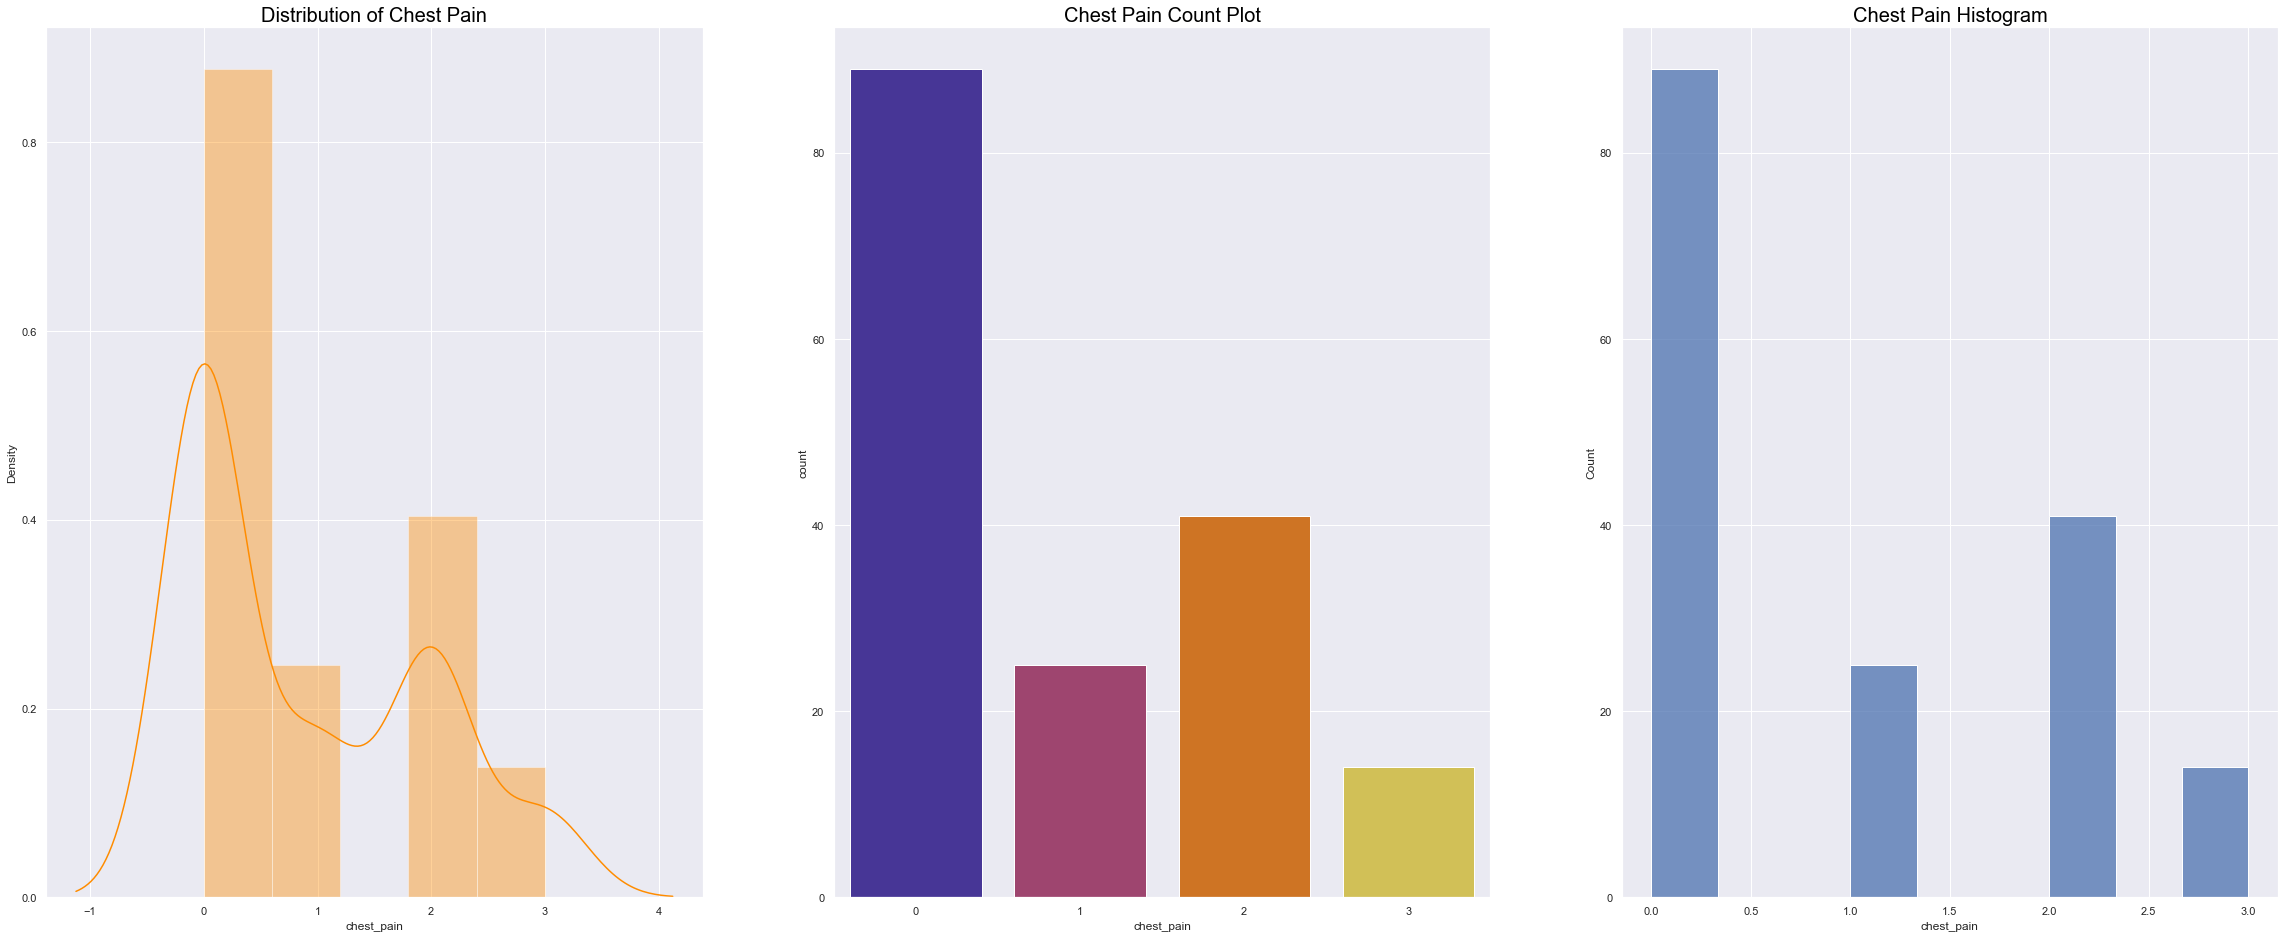

In [8]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Chest Pain", size=20, color='black')
sns.distplot(train.chest_pain, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Chest Pain Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["chest_pain"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Chest Pain Histogram", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x=train["chest_pain"], palette='CMRmap')

#### Takeaways:
- Far more peeople with a type 0 chest pain
    - type 0 chest pain
        - 89
    - type 1 chest pain
        - 25
    - type 2 chest pain
        - 41
    - type 3 chest pain
        - 14

___

#### Explore Resting Blood Pressure

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Resting Blood Pressure Boxen Plot'}, xlabel='resting_bp'>

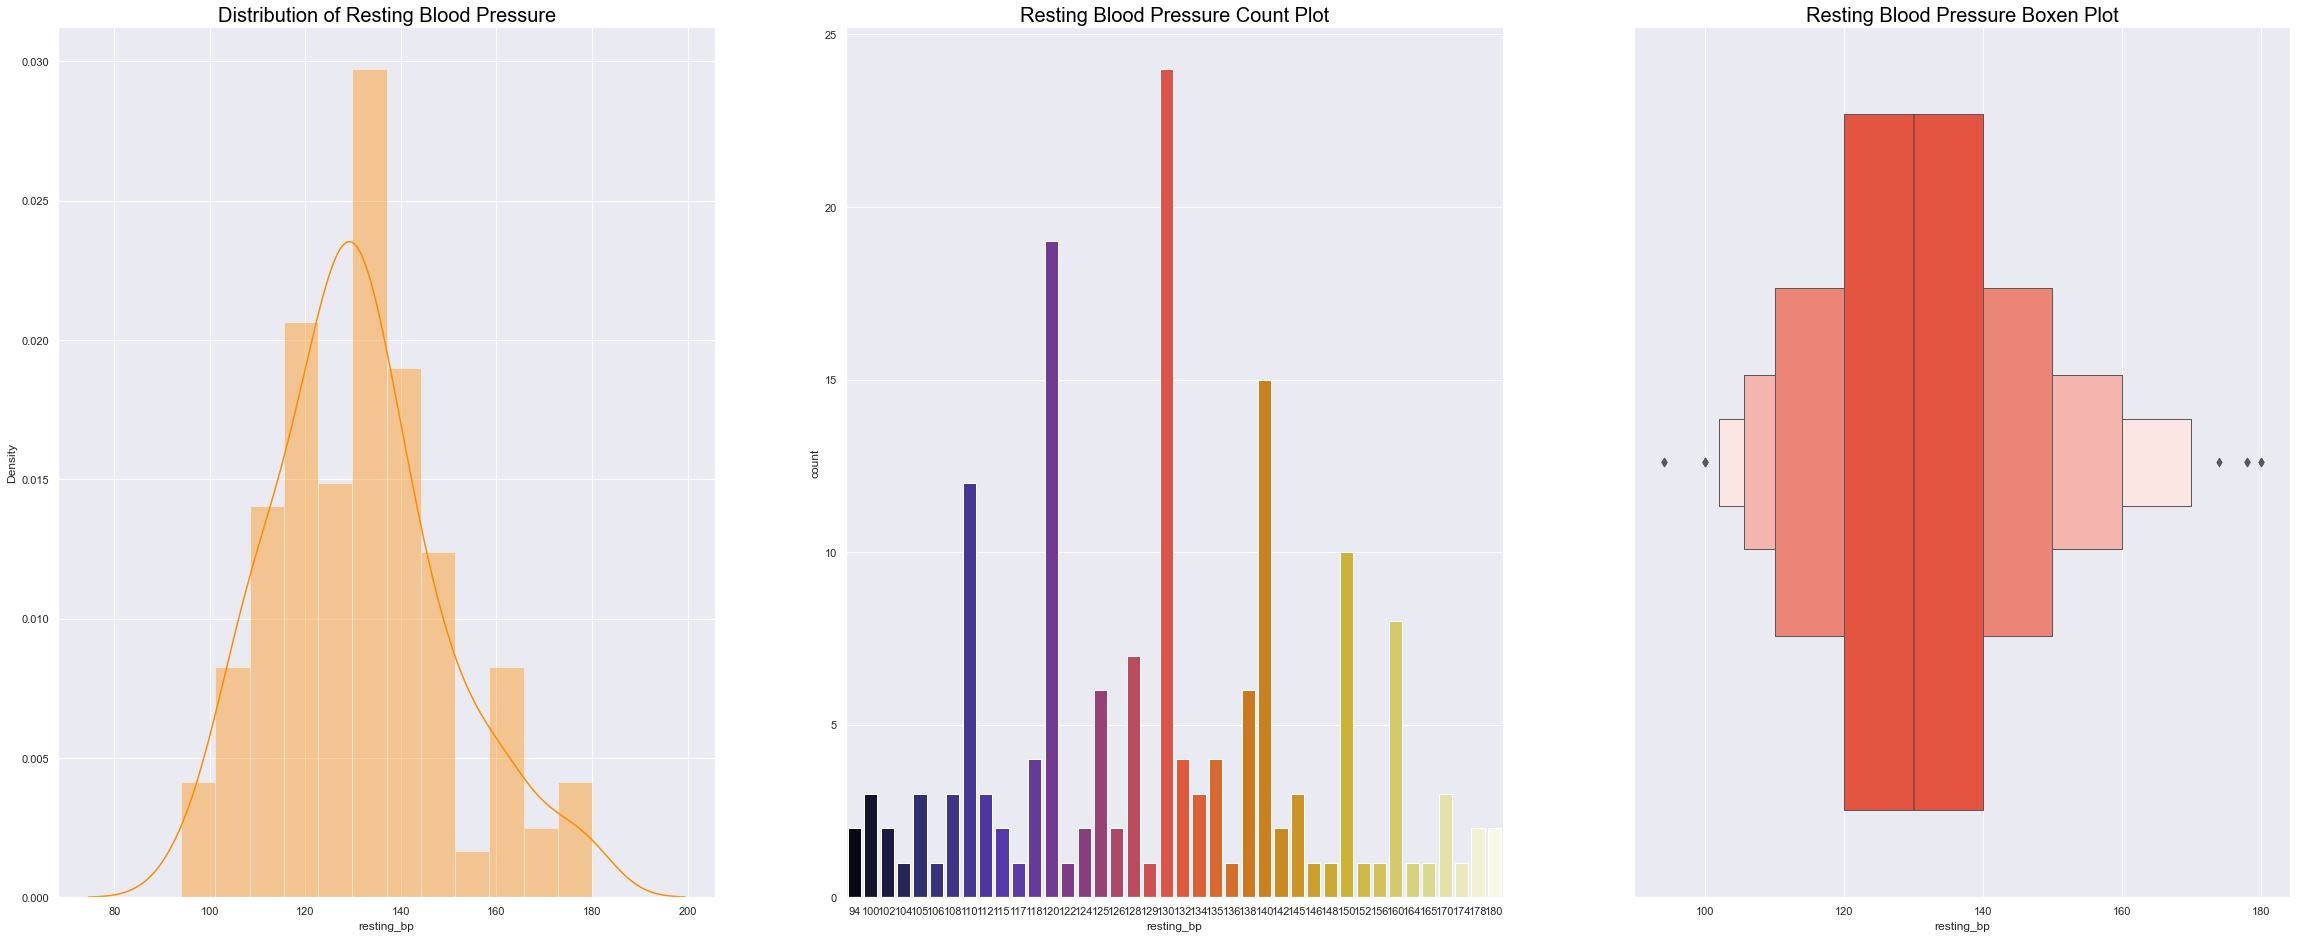

In [9]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Resting Blood Pressure", size=20, color='black')
sns.distplot(train.resting_bp, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Resting Blood Pressure Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["resting_bp"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Resting Blood Pressure Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["resting_bp"], palette='CMRmap')

#### Takeaways:
- There are seemingly randomly placed peaks at:
    - 110
    - 120
    - 130
    - 138
    - 150
    - 160

___

#### Explore Cholestoral

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Cholestoral Boxen Plot'}, xlabel='cholestoral'>

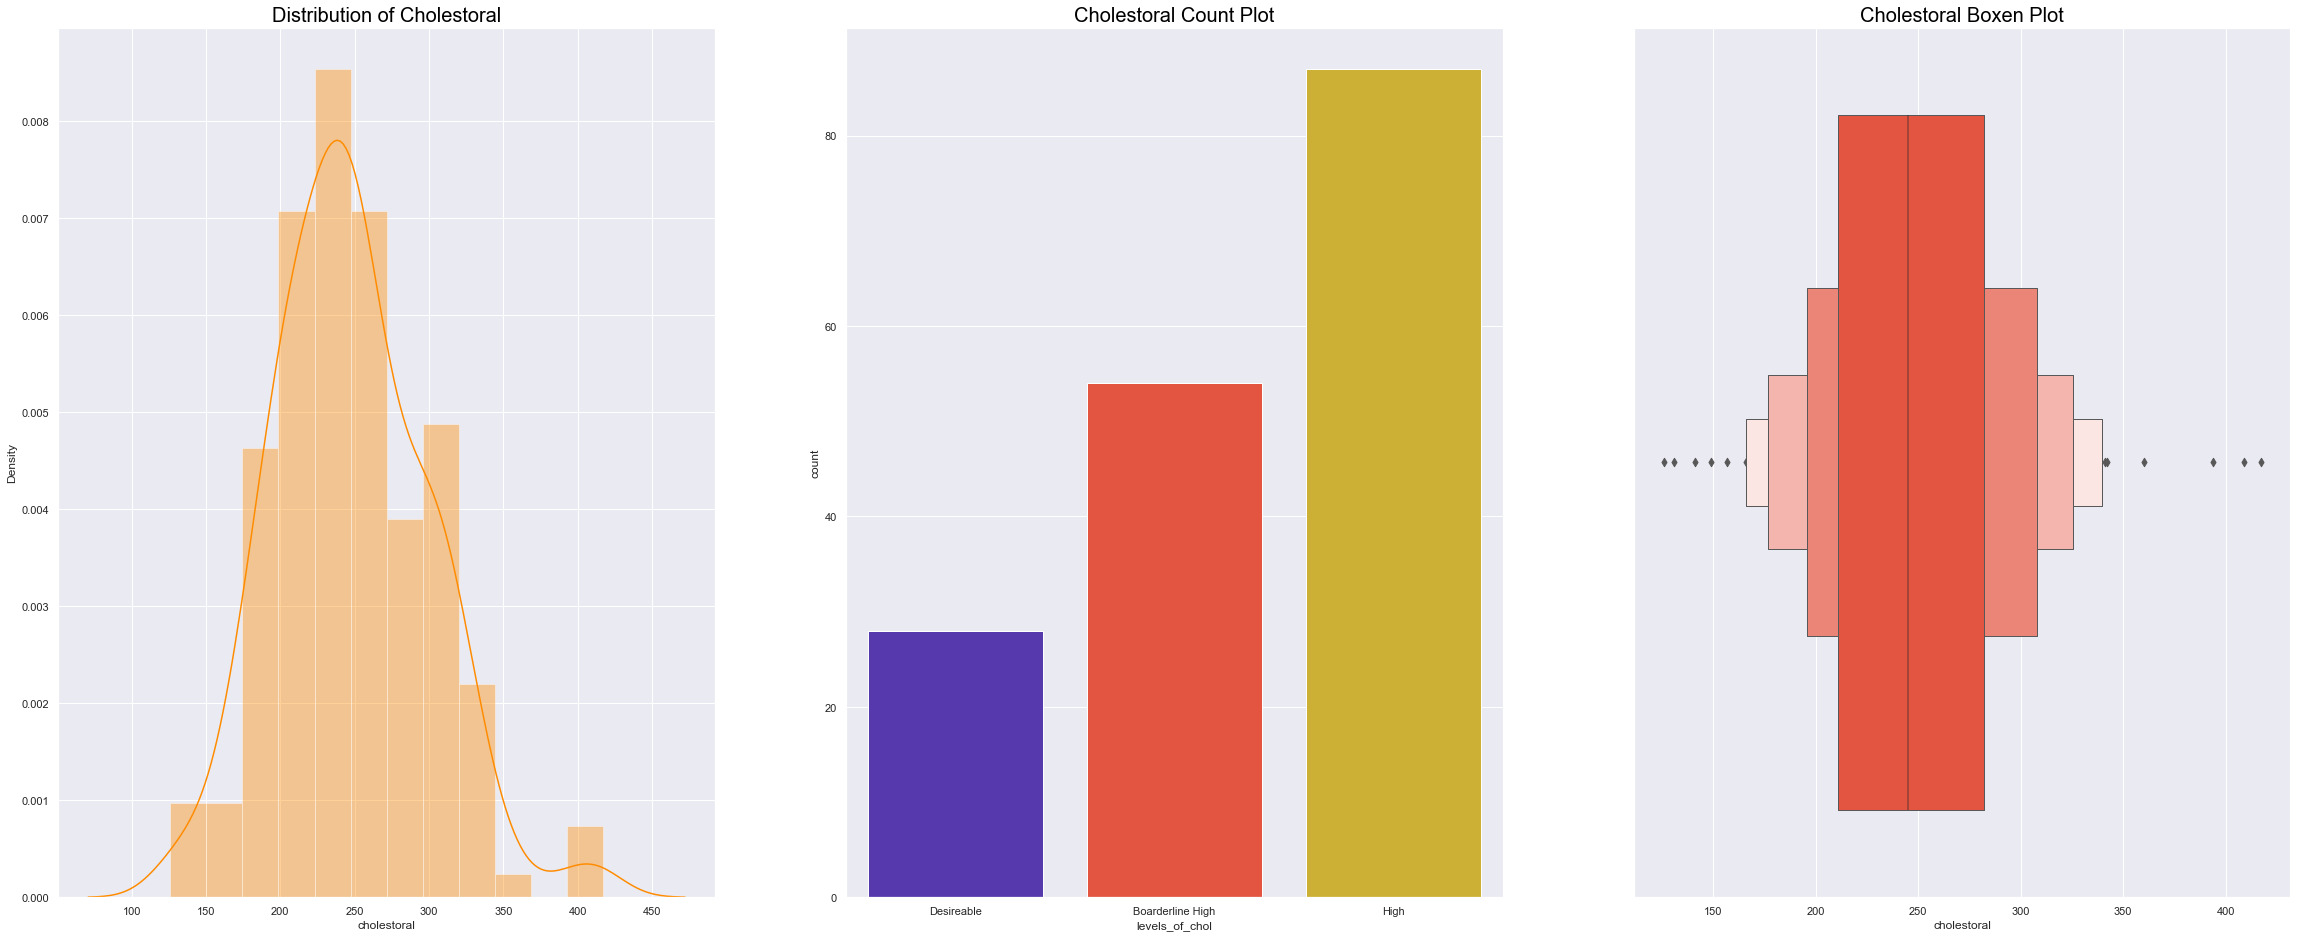

In [10]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Cholestoral", size=20, color='black')
sns.distplot(train.cholestoral, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Cholestoral Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["levels_of_chol"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Cholestoral Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["cholestoral"], palette='CMRmap')

#### Takeaways:
- Cholestoral peaks between 200 and 250
- There are significantly more people with a cholesteral over 240.
    - 87 data points above 240
    - 54 between 200 and 240
    - 28 below 200

___

#### Explore Fasting Blood Sugar

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Blood Sugar Above 120 Boxen Plot'}, xlabel='blood_sugar_above_120'>

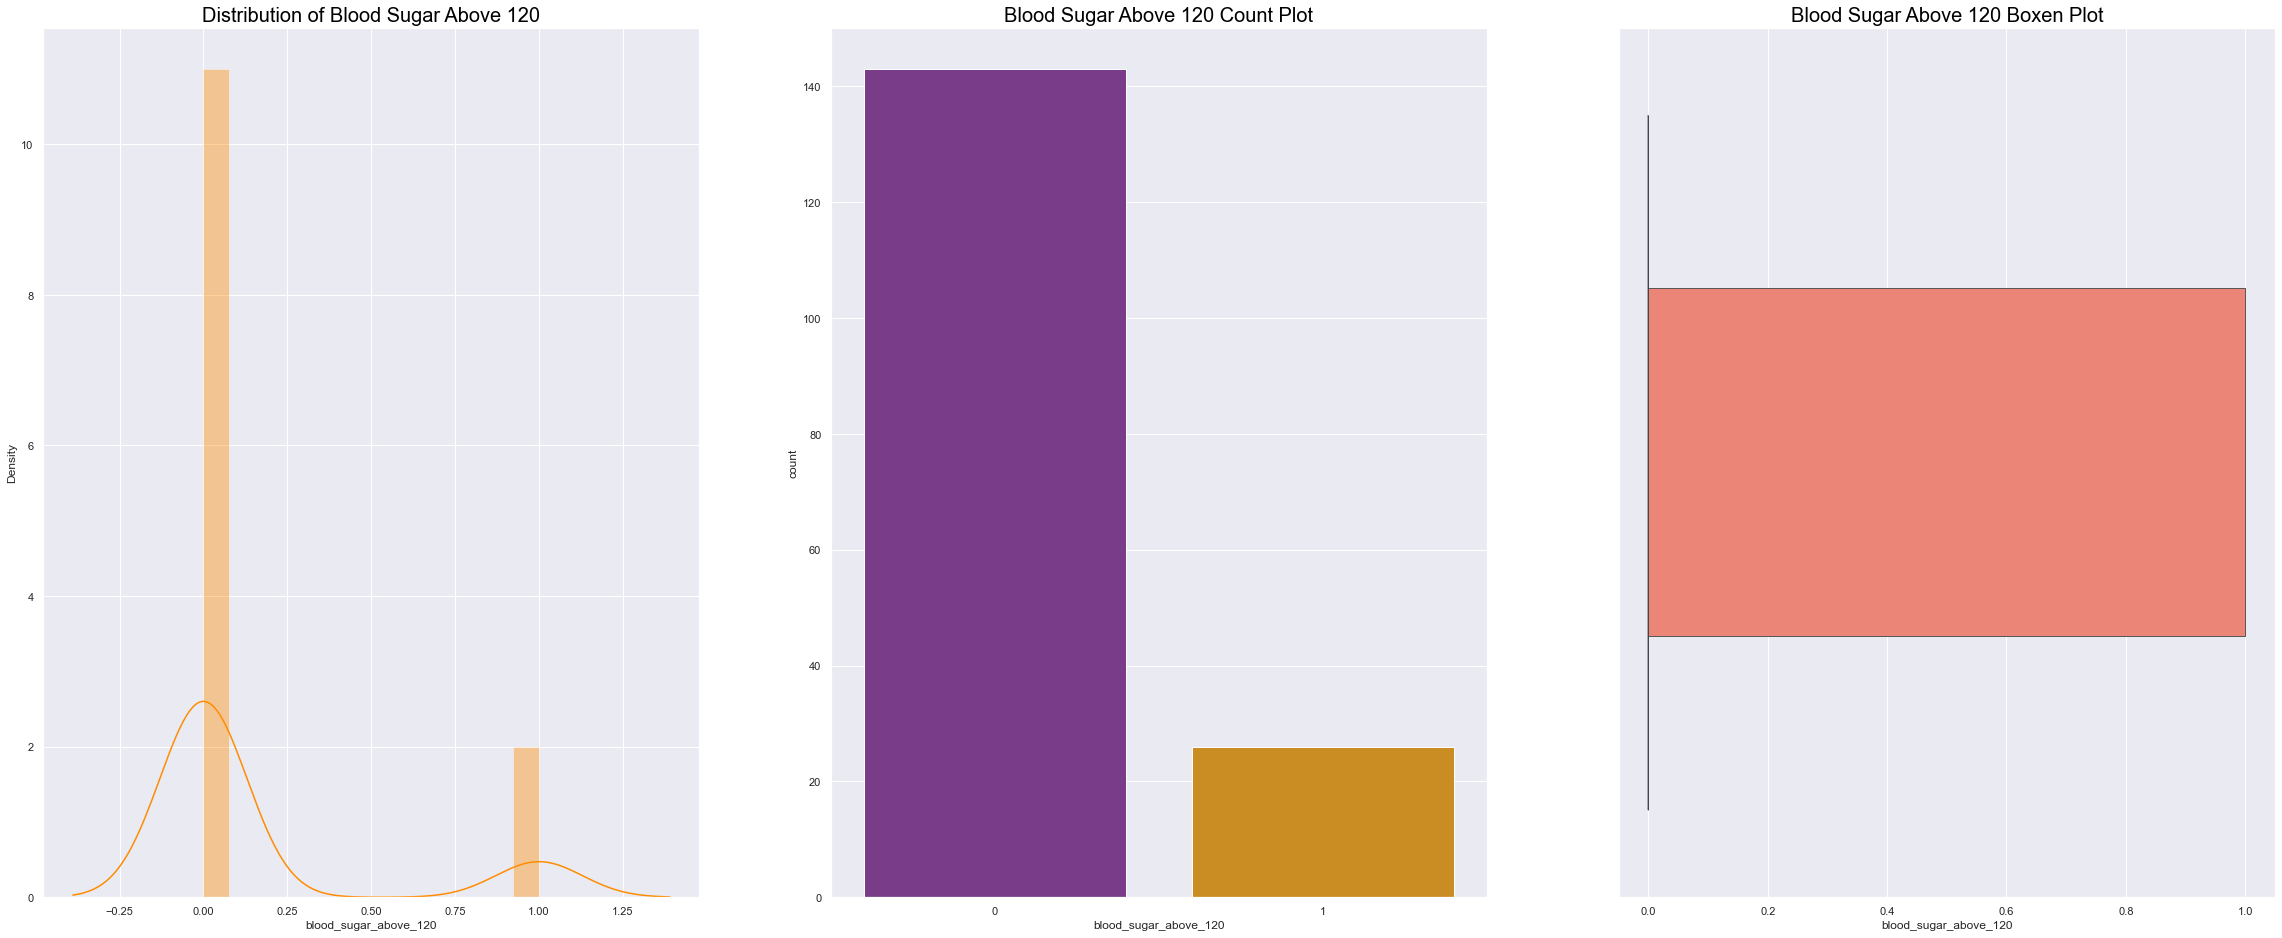

In [11]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Blood Sugar Above 120", size=20, color='black')
sns.distplot(train.blood_sugar_above_120, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Blood Sugar Above 120 Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["blood_sugar_above_120"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Blood Sugar Above 120 Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["blood_sugar_above_120"], palette='CMRmap')

### Takeaways:
- 143 data point with blood sugar less then 120
- Only 26 are above 120

___

#### Explore Resting Electrocardiographic Results

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Electrocardiographic Boxen Plot'}, xlabel='resting_electocardio'>

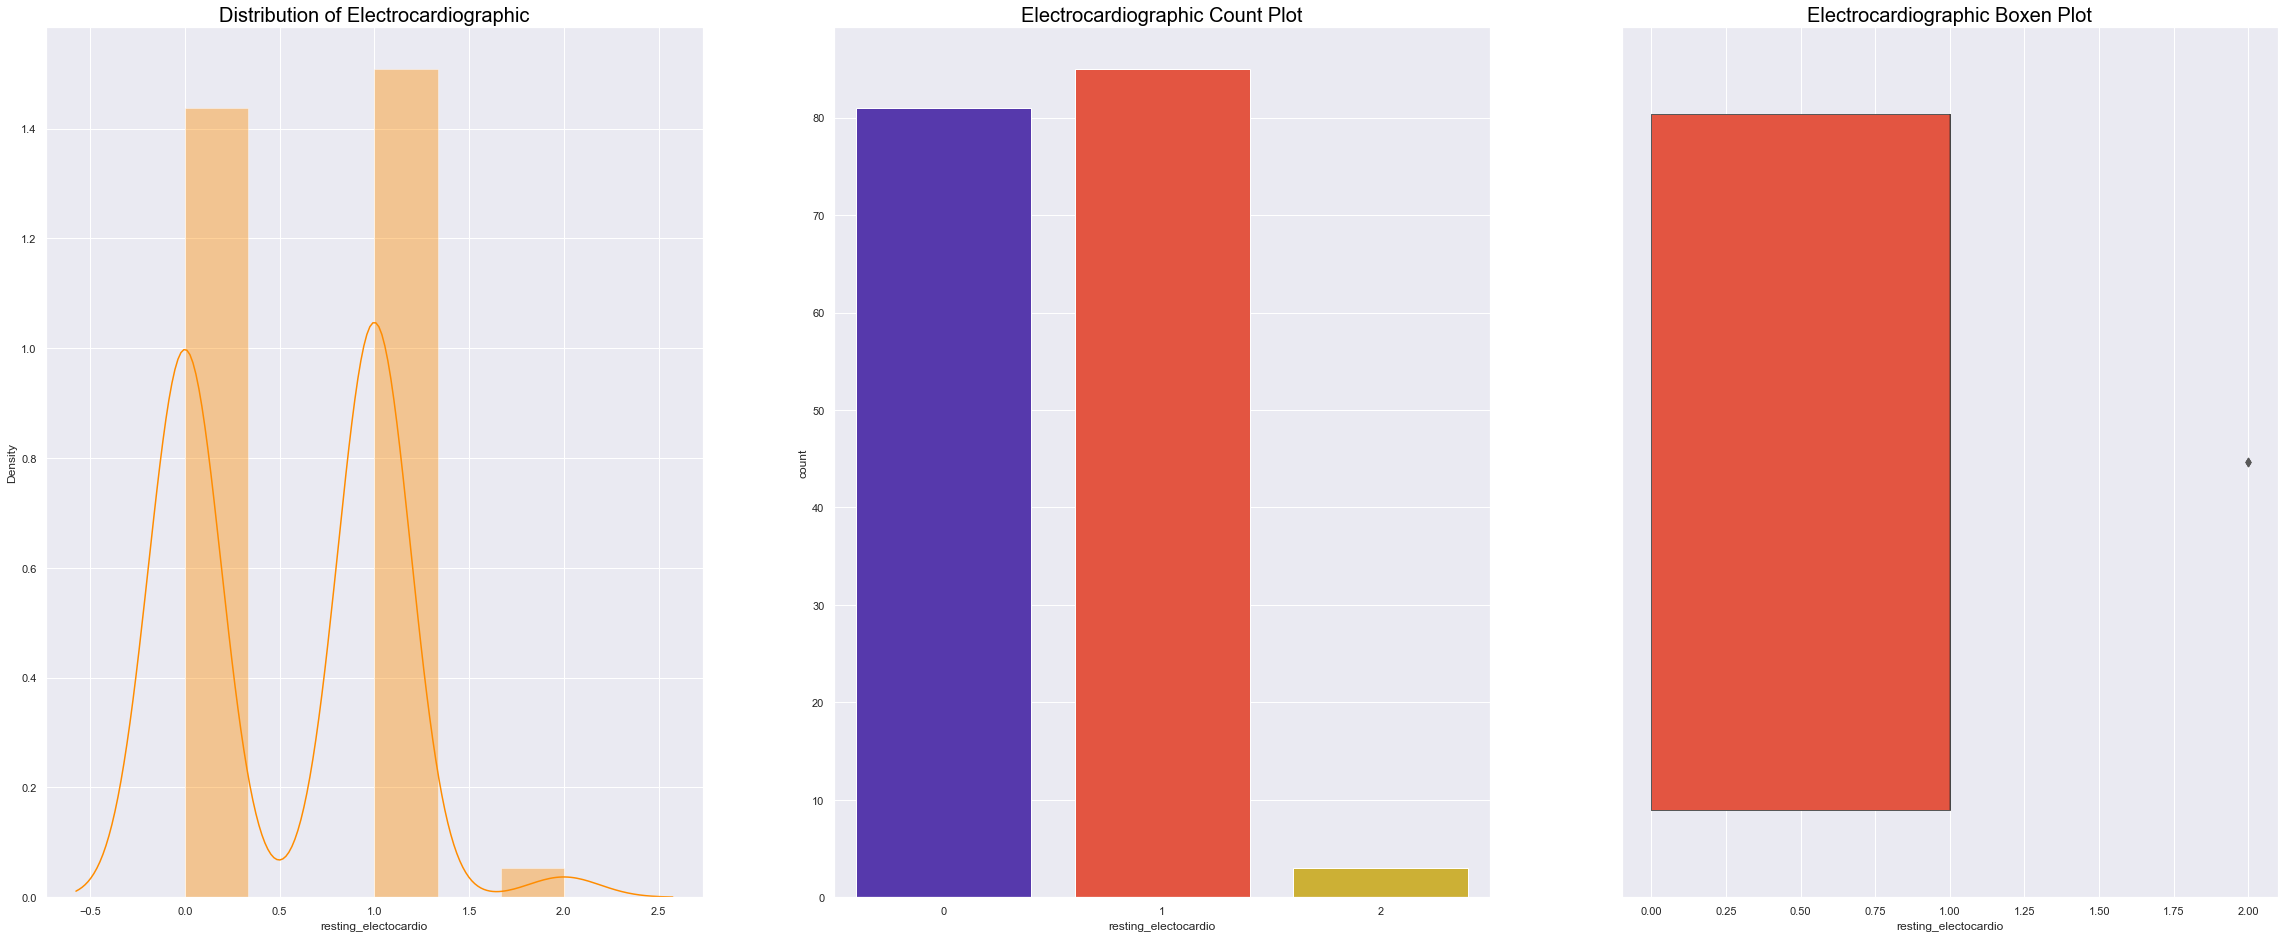

In [12]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Electrocardiographic", size=20, color='black')
sns.distplot(train.resting_electocardio, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Electrocardiographic Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["resting_electocardio"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Electrocardiographic Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["resting_electocardio"], palette='CMRmap')

#### Takeaways:
- Barely any type 2 results
- about an even amount of 0 and 1 results

___

#### Explore Maximum Heart Rate

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Heart Rates Boxen Plot'}, xlabel='max_heart_rate'>

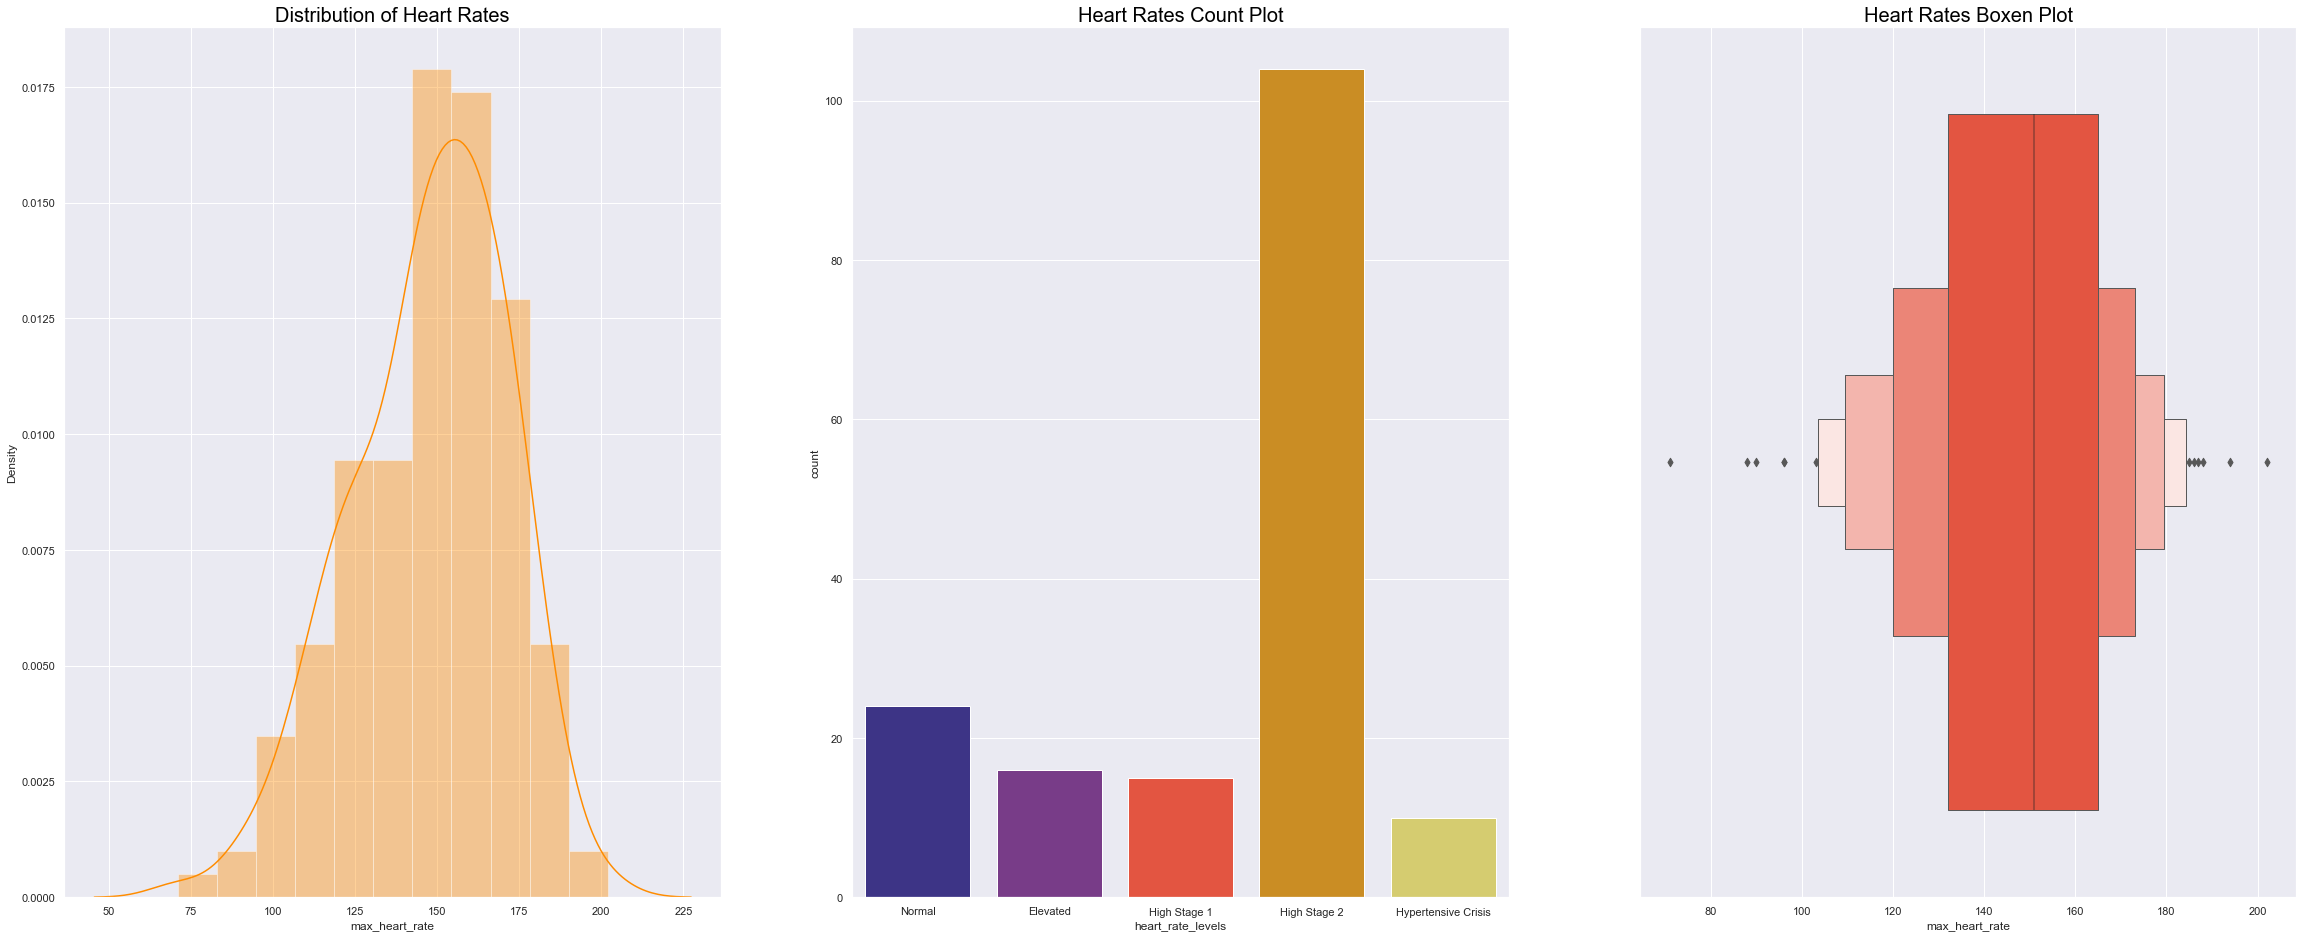

In [13]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Heart Rates", size=20, color='black')
sns.distplot(train.max_heart_rate, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Heart Rates Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["heart_rate_levels"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Heart Rates Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["max_heart_rate"], palette='CMRmap')

In [14]:
train.heart_rate_levels.value_counts()

High Stage 2           104
Normal                  24
Elevated                16
High Stage 1            15
Hypertensive Crisis     10
Name: heart_rate_levels, dtype: int64

#### Takeaways:
- 104 people have a heart rate between 140 and 180
    - This is 61.5% of all the data points
- all others are pretty low in comparison

___

#### Explore Exercise Induced Angina

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Exercise Induced Angina Boxen Plot'}, xlabel='exercise_angina'>

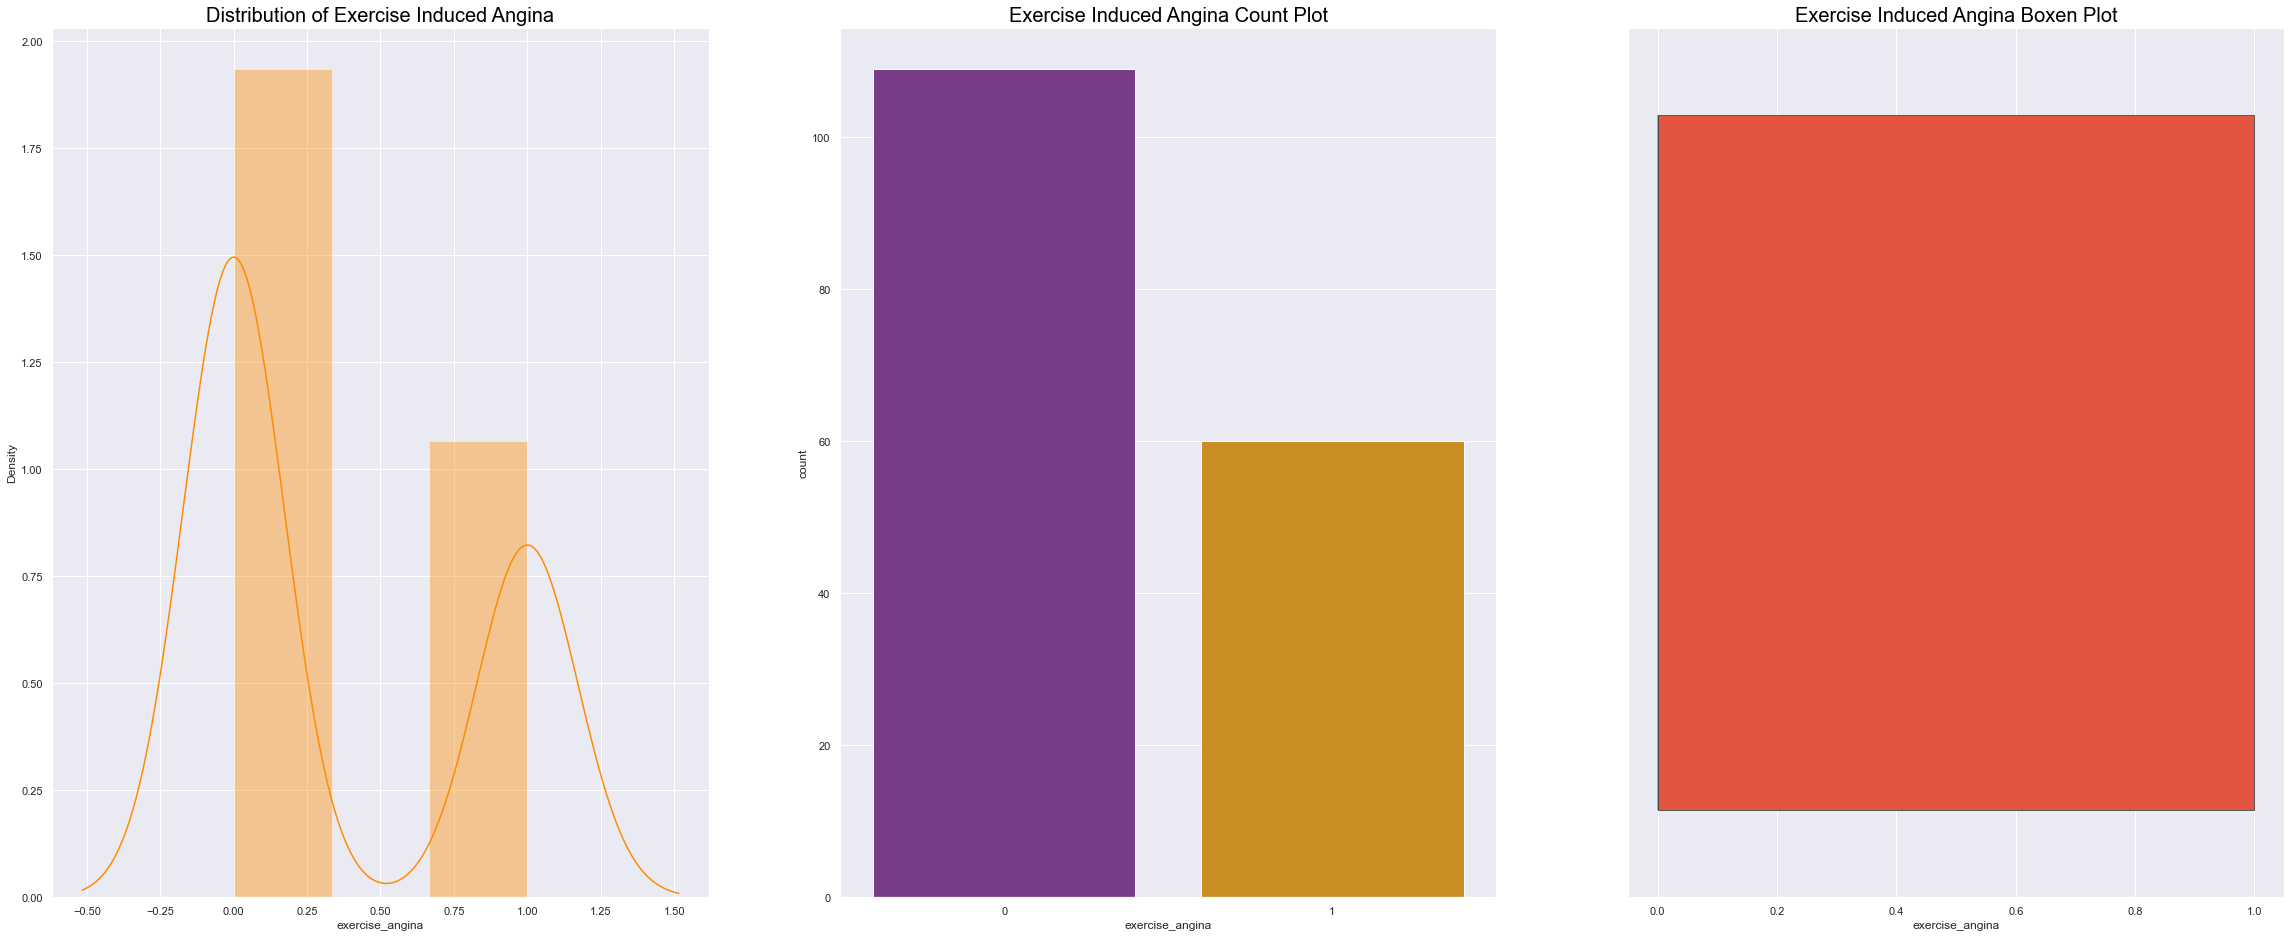

In [15]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Exercise Induced Angina", size=20, color='black')
sns.distplot(train.exercise_angina, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Exercise Induced Angina Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["exercise_angina"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Exercise Induced Angina Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["exercise_angina"], palette='CMRmap')

#### Takeaways:
- There are more people without an exercise induced angina than with one

___

#### Explore ST Depression Induced by Exercise

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='rest_angina'>

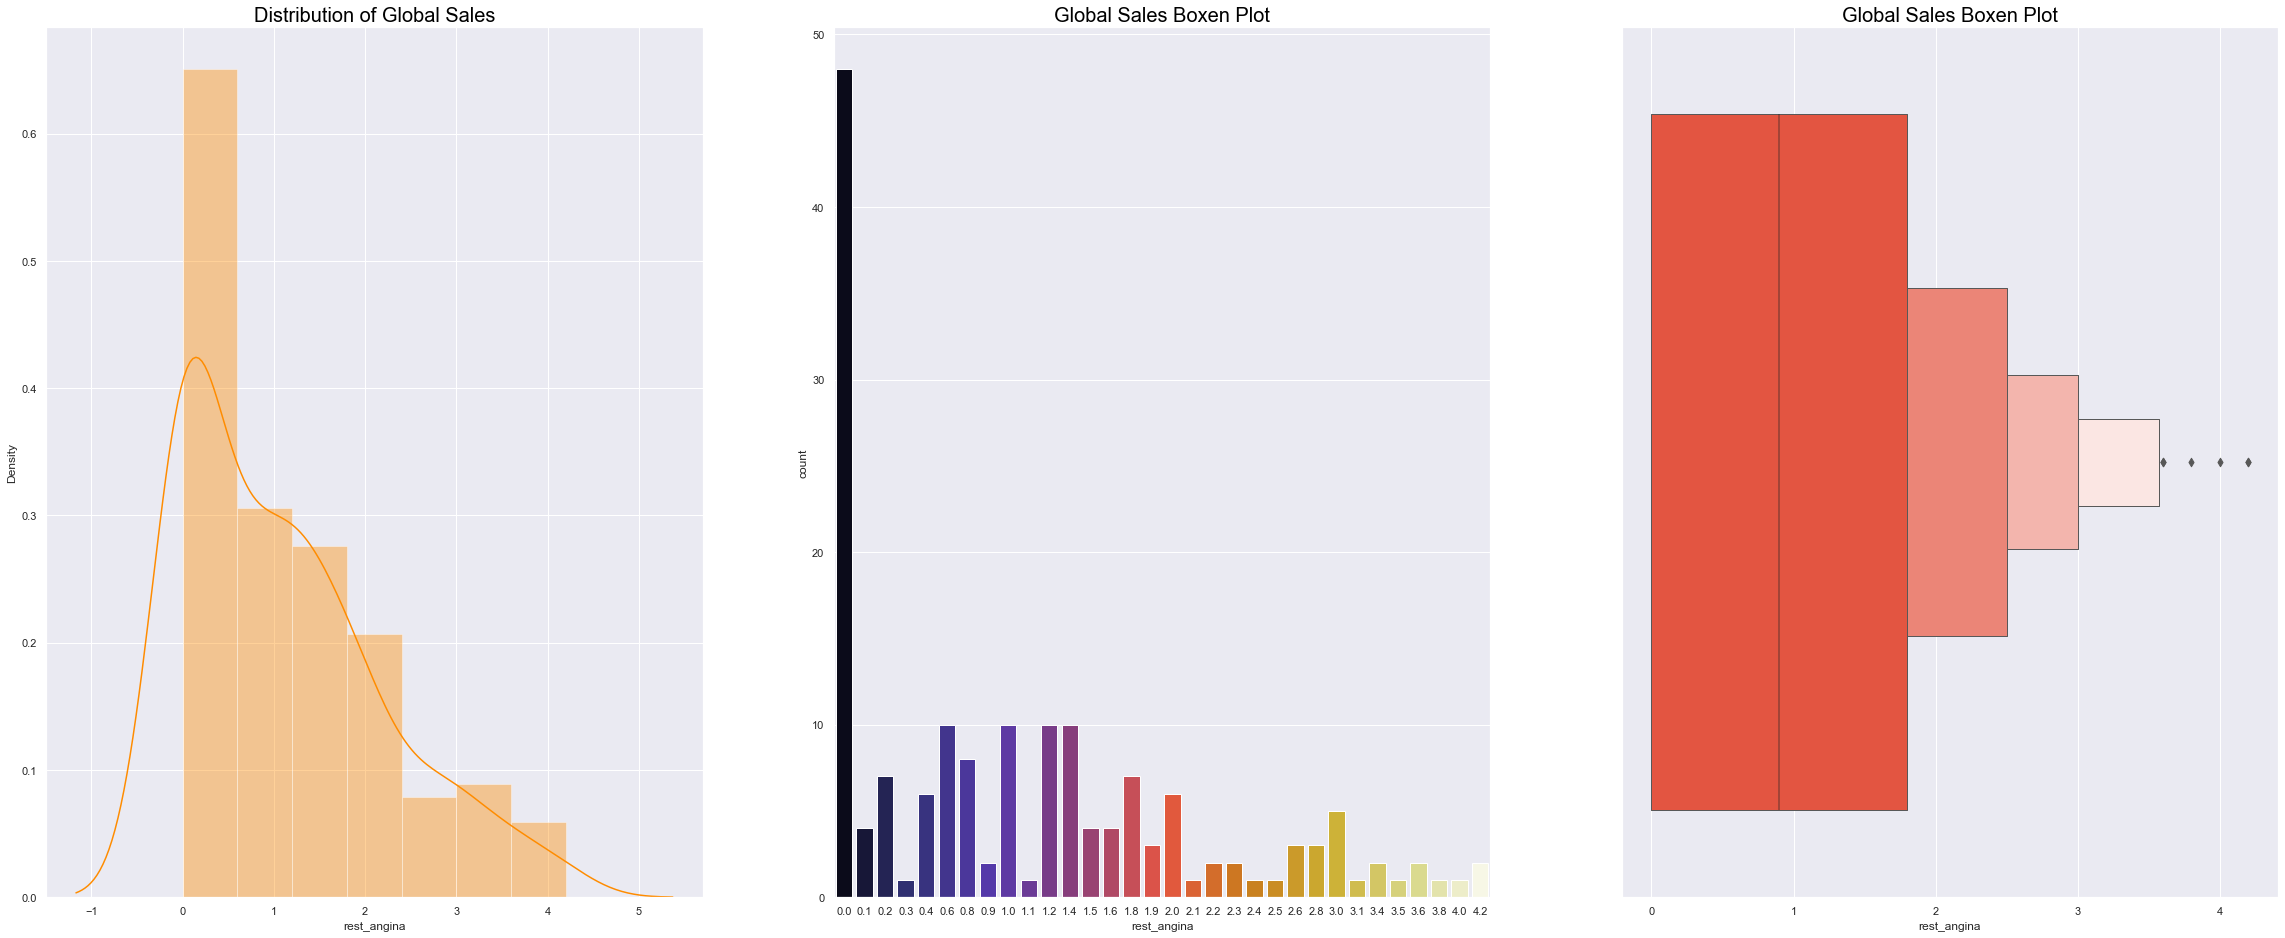

In [16]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Angina while Resting", size=20, color='black')
sns.distplot(train.rest_angina, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Angina while Resting Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["rest_angina"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Angina while Resting Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["rest_angina"], palette='CMRmap')

#### Takeaways:
- Not too much gathered here.

___

#### Explore Slope of the ST Segment

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='slope'>

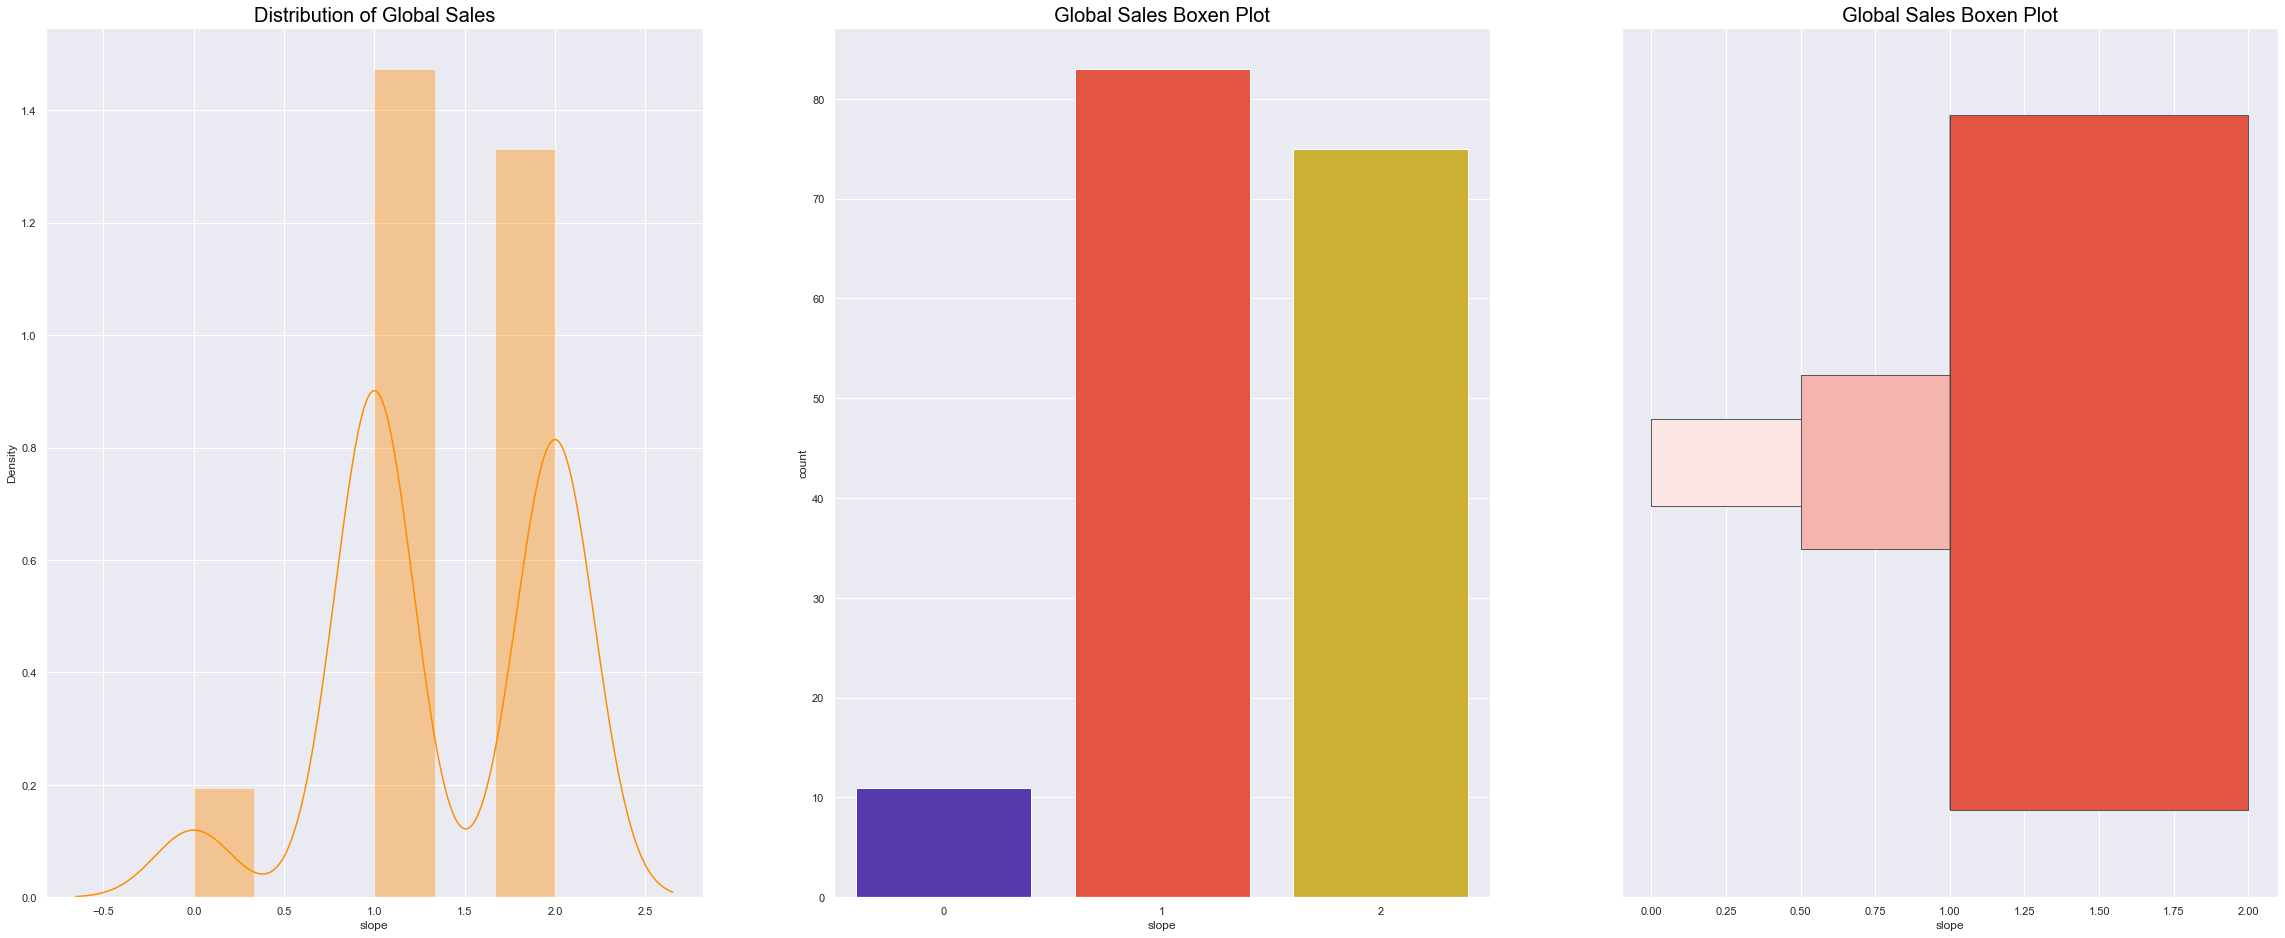

In [18]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Slope", size=20, color='black')
sns.distplot(train.slope, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Slope Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["slope"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Slope Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["slope"], palette='CMRmap')

#### Takeaways:
- Not much to gether here

___

#### Explore Amount of Major Blood Vessels

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='count_major_vessels'>

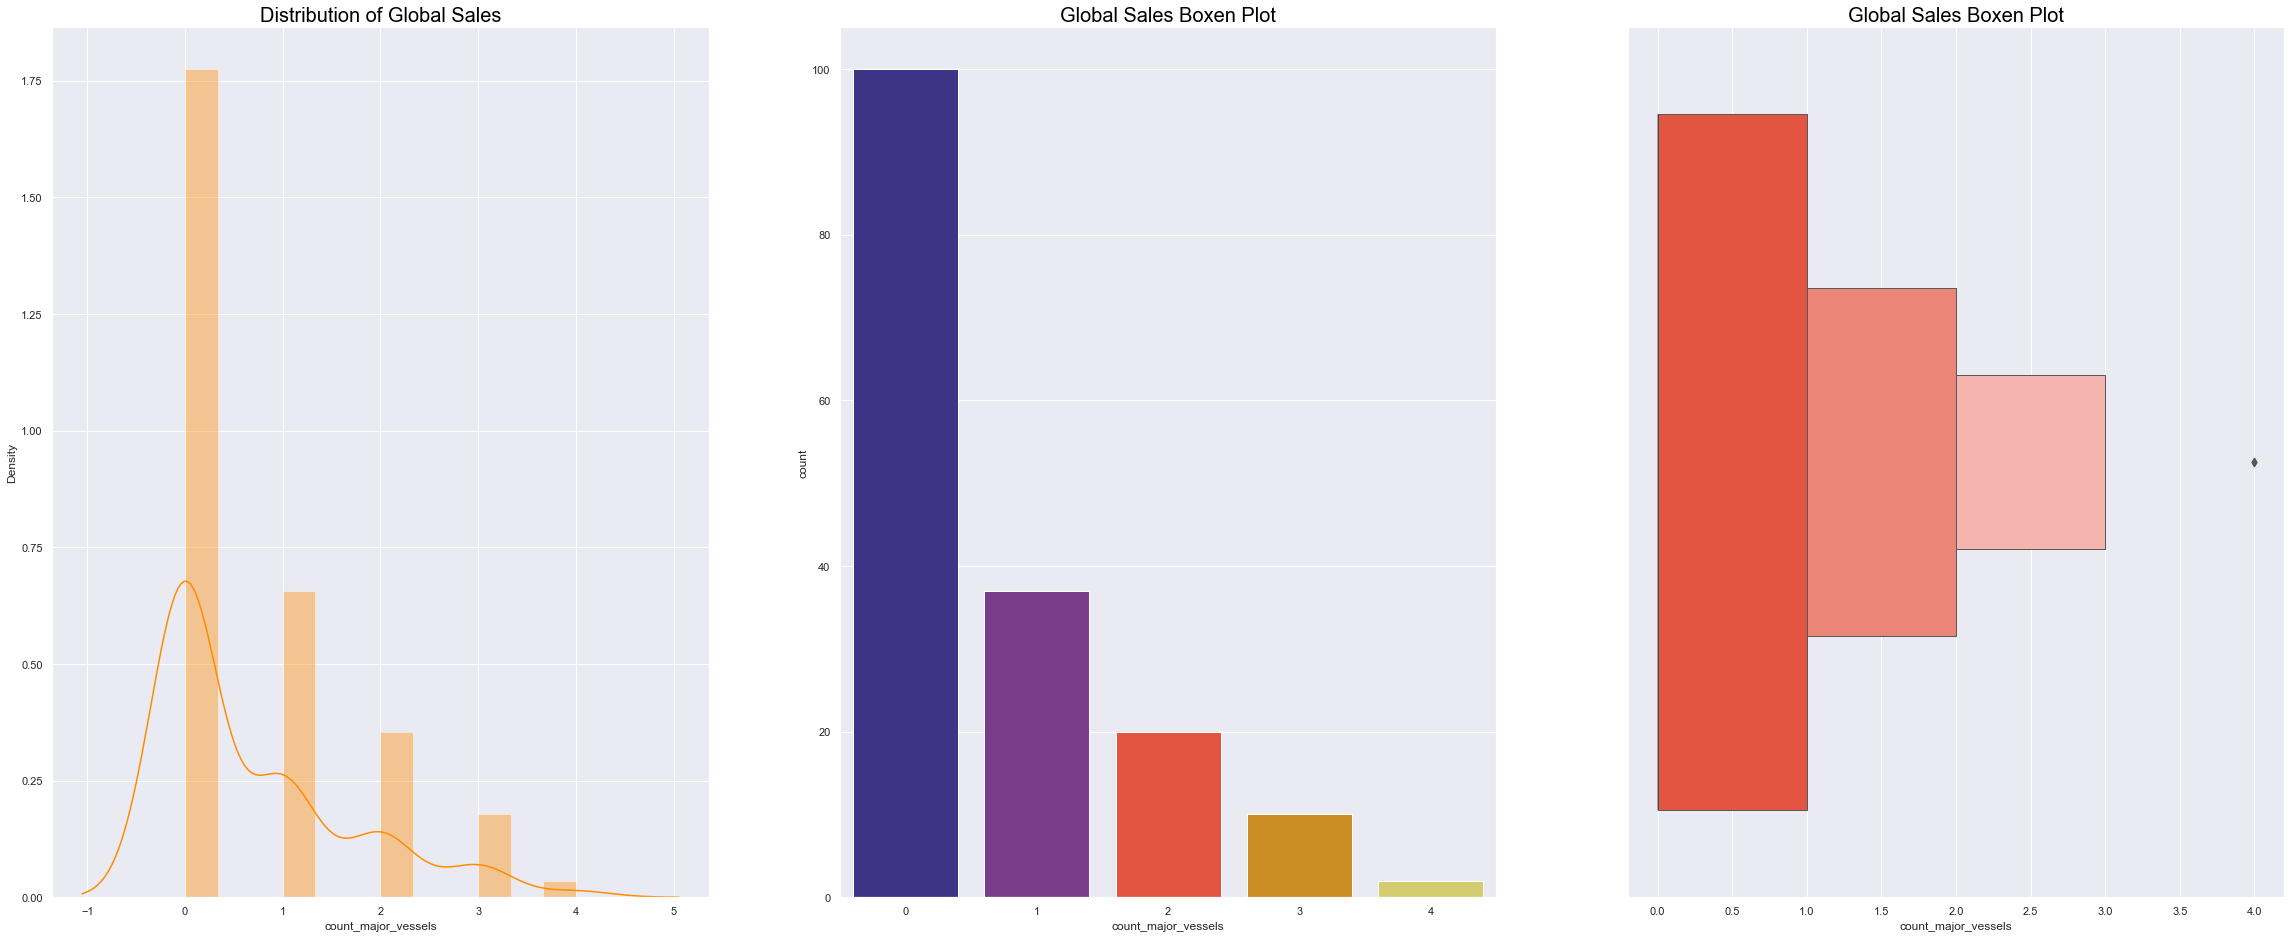

In [19]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Major Vessels Colored", size=20, color='black')
sns.distplot(train.count_major_vessels, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Major Vessels Colored Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["count_major_vessels"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Major Vessels Colored Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["count_major_vessels"], palette='CMRmap')

#### Takeaways:
- 100 datapoints where 0 major vessels were colored by flourosopy
- The more the number of vessels colors the less the number of data points

___

#### Explore Defect Type

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='defect_type'>

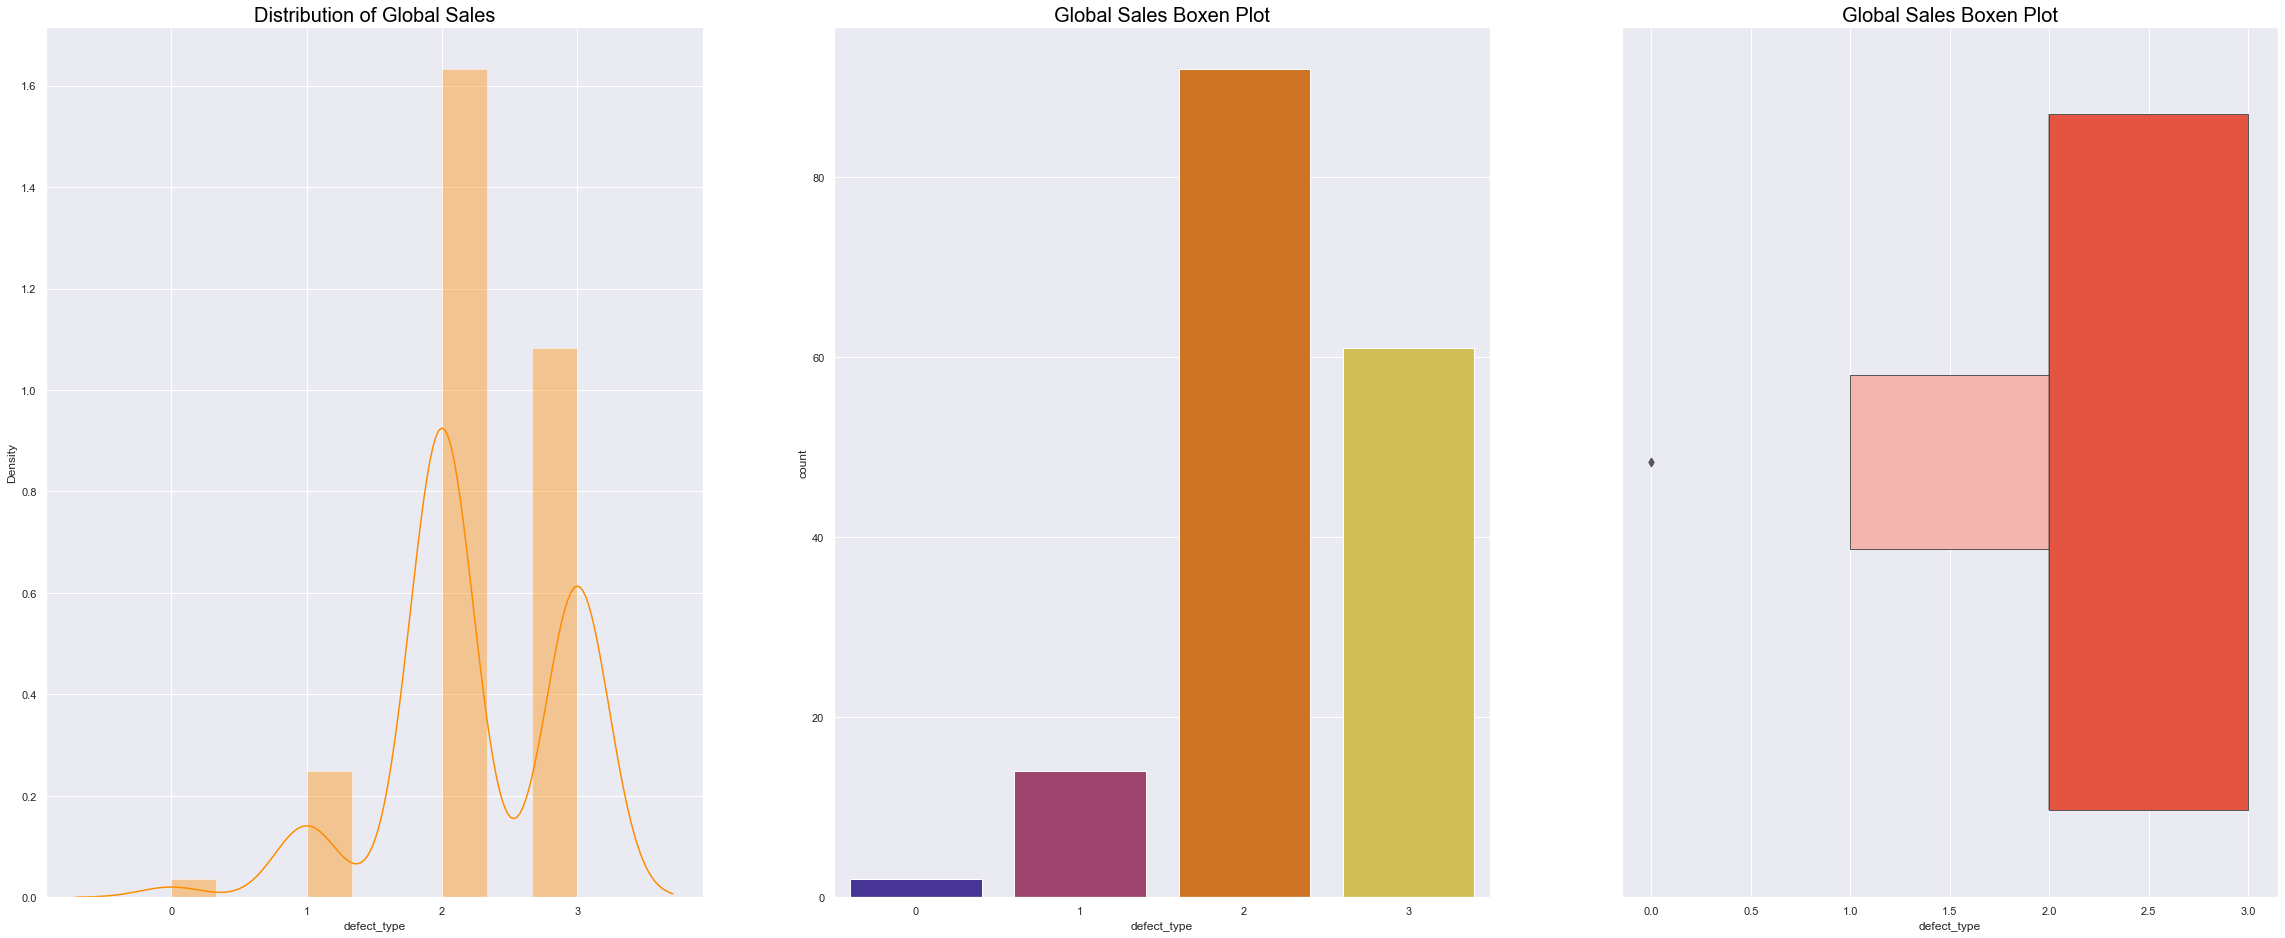

In [20]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Defect Type", size=20, color='black')
sns.distplot(train.defect_type, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Defect Type Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["defect_type"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Defect Type Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["defect_type"], palette='CMRmap')

#### Takeaways:
- Far more type 2 and 3 defect types

___

#### Explore Having Heart Disease or Not

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='has_heart_disease'>

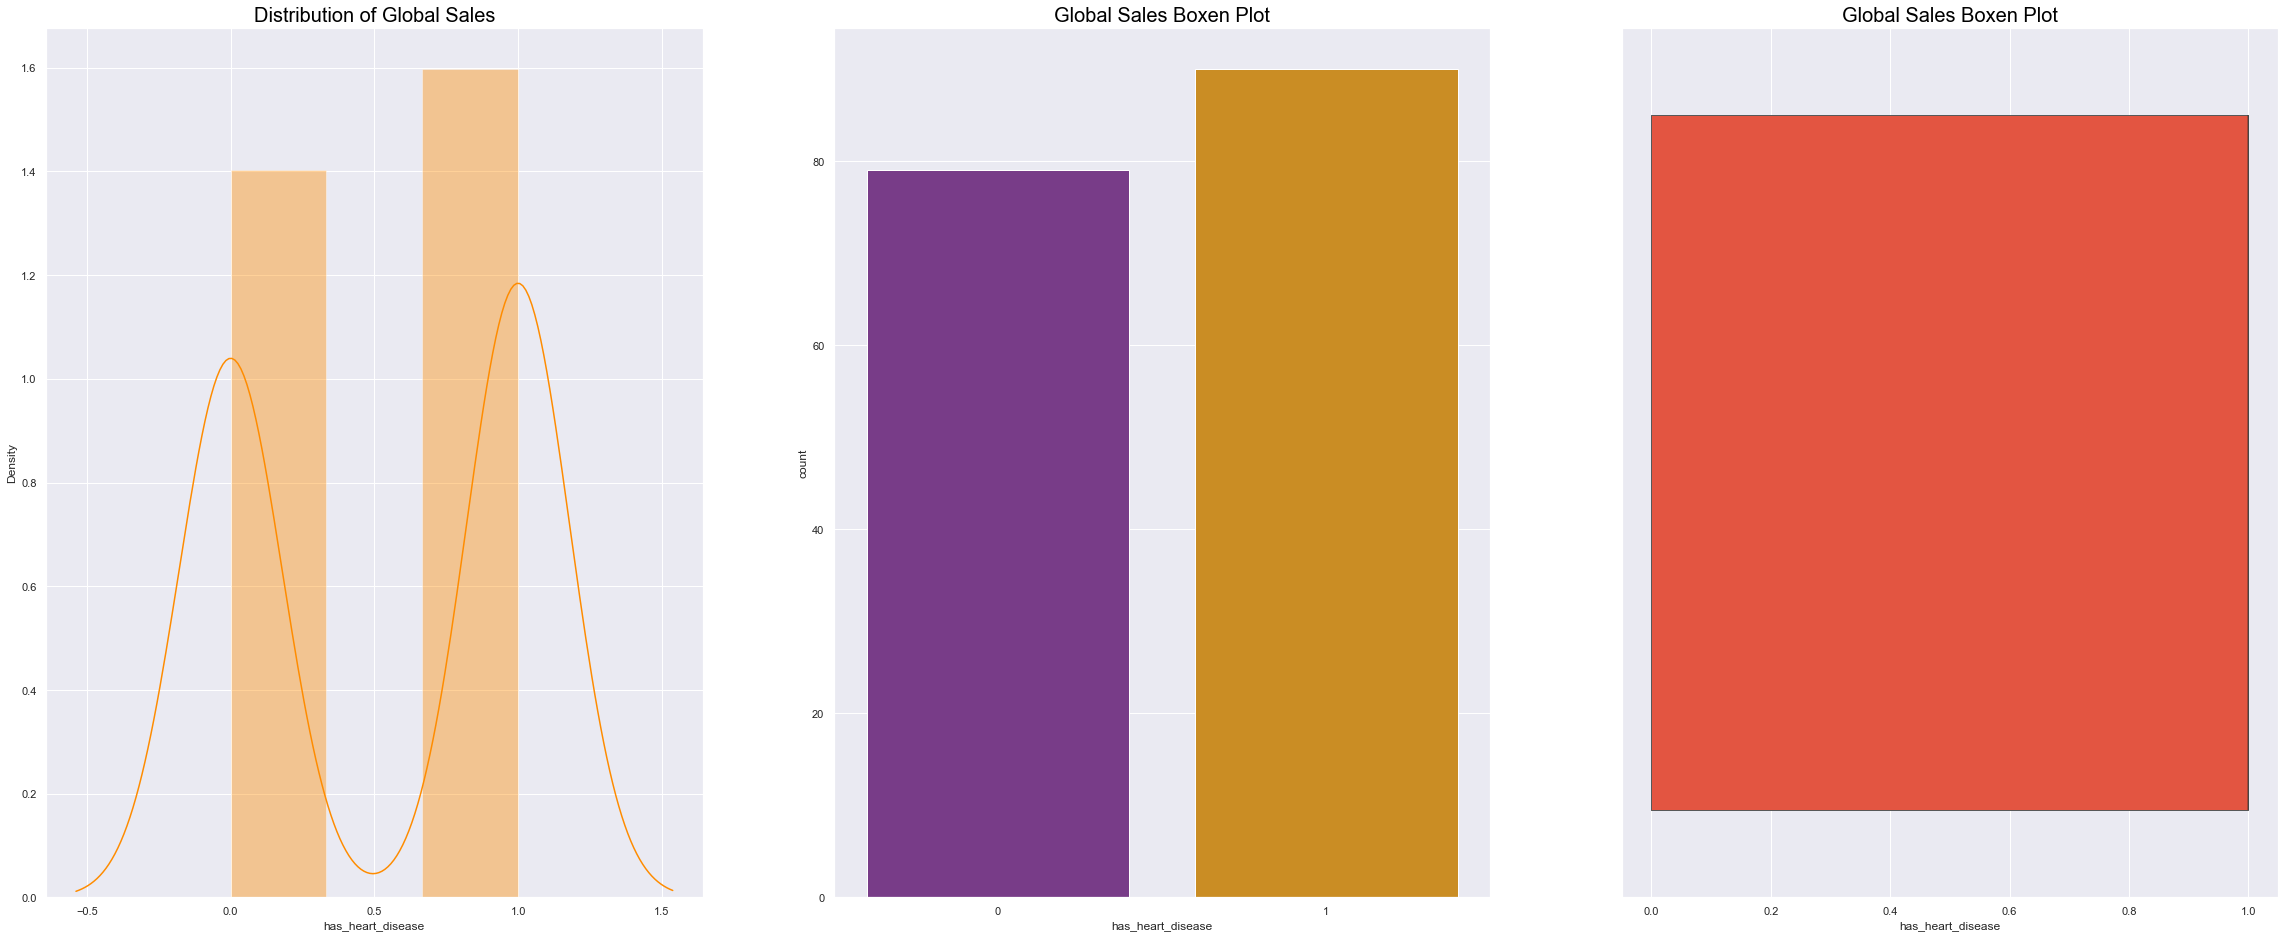

In [21]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Has Heart Disease", size=20, color='black')
sns.distplot(train.has_heart_disease, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Has Heart Disease Count Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["has_heart_disease"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Has Heart Disease Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["has_heart_disease"], palette='CMRmap')

#### Takeaways:
- Pretty even distribution of has and doesnt have heart disease

___

#### Explore Age Groups

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='age_groups', ylabel='count'>

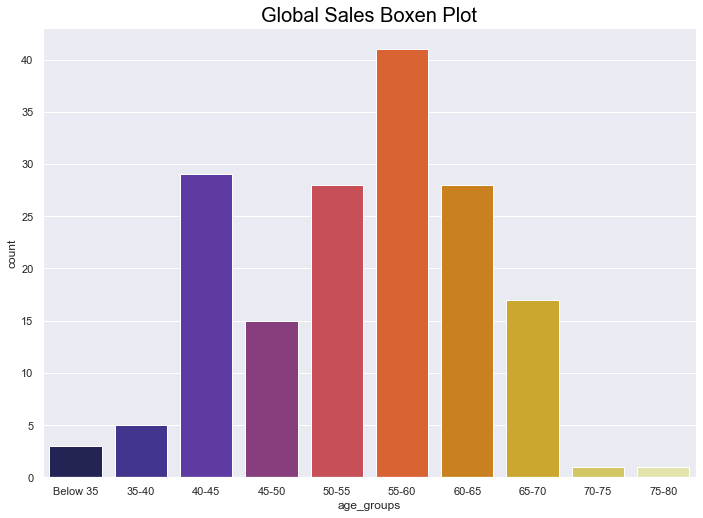

In [22]:
plt.title("Age Groups Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["age_groups"], palette='CMRmap')

#### Takeaways:
- There are more people in the 55 to 60 year range than any other age group
    - Below 35     
        - 3
    - 35-40        
        - 5
    - 40-45       
        - 29
    - 45-50       
        - 15
    - 50-55       
        - 28
    - 55-60       
        - 41
    - 60-65       
        - 28
    - 65-70       
        - 17
    - 70-75        
        - 1
    - 75-80        
        - 1


___

#### Explore Levels of Cholestoral

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='levels_of_chol', ylabel='count'>

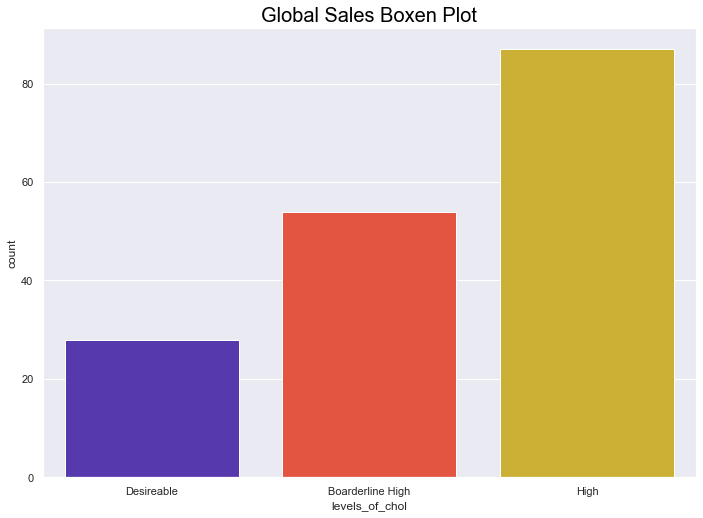

In [23]:
plt.title("Levels fo Cholestoral Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["levels_of_chol"], palette='CMRmap')

#### Takeaways:
- There are more datapoints with high cholestoral

___

#### Explore Heart Rate Levels

<AxesSubplot:title={'center':'Heart Rate Levels Boxen Plot'}, xlabel='heart_rate_levels', ylabel='count'>

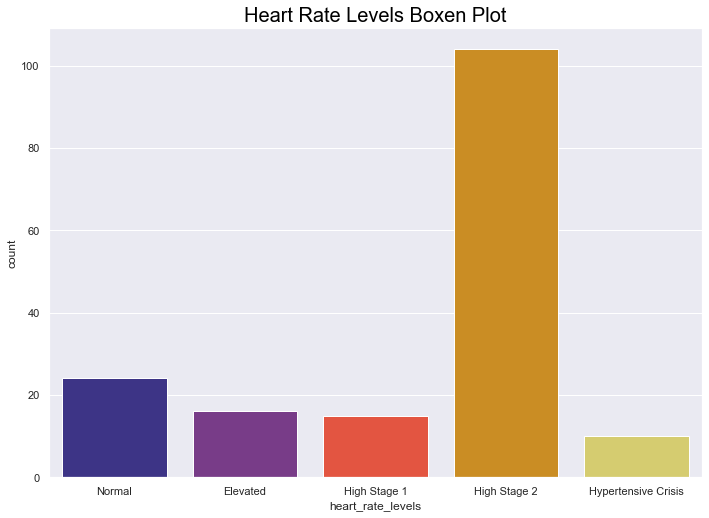

In [28]:
plt.title("Heart Rate Levels Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["heart_rate_levels"], palette='CMRmap')

#### Takeaways:
- There is a crazy amount of stage 2 high heart rates
    - 104 at stage 2 high

___

# Correlation Heat Map

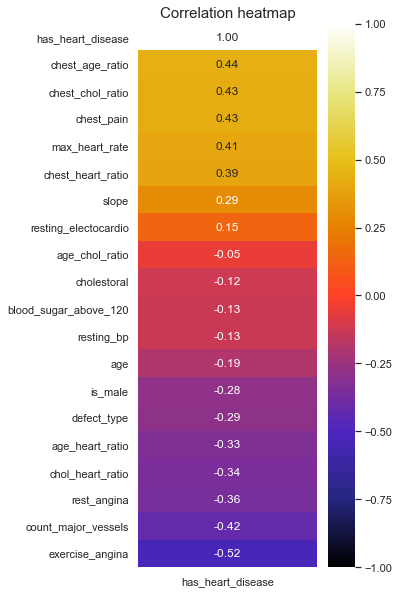

In [25]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['has_heart_disease'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -1, 
            vmax = 1, cmap = 'CMRmap')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

#### Takeaways:
- There are a lot of features with a high correlation to having heart disease

___

# Bivariate Exploration